# Метод K ближайших соседей (KNN)
Создано с использованием идей и материалов Нейчева Радослава Георгиева 

автор Д.В.Яценко

## Общее описание алгоритма

Алгоритм состоит в том, что при предсказании класса объекта, его метка выбирается такой же как у наибольшего количества объектов, находящихся рядом с искомым. Для этого необходимо выполнить следующую последовательность  шагов:

- найти расстояние от искомого объекта $u$ до каждого из объектов $x$ обучающей выборки;
- выбрать $k$ объектов, с мниимальным расстоянием;
- выбрать класс, который чаще всего встречается среди выбранных объектов - это и есть класс искомого объекта.

$$a(u) = \underset{y}{\text{argmax}}\sum_{i=1}^{k}[y_{u}^{(i)}=y],$$


## Определение расстояния

Метрическое пространство - это пара $(M,d)$, где $М$ множество вещественных чисел, а $d: M \times M \rightarrow \mathbb{R}$ функция расстояния (метрика), определяющая расстояние в _метрическом_ пространств . Она ($\rho$) должна удовлетворять трем аксиомам:

1. $\rho(x, y) \geq 0, \rho(x, y) = 0 \Leftrightarrow x = y;$ -- аксиома положительности и аксиома тождества;
2. $\rho(x, y) = \rho (y, x); $ -- аксиома симметричности;
3. $\rho(x, y) \leq \rho(x, z) + \rho(z, y).$ -- аксиома треугольника или неравенство треугольника.


Евклидова метрика

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

Манхэттенская метрика

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

Метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

При этом при $q = 1$ получаем манхэттенскую ($L_{1}$) метрику, при $q = 2$ - евклидову ($L_{2}$) метрику.

## Веса
Модификацией алгоритма kNN является добавление дополнительных параметров - весов, зависящих от их порядкового номера или расстояния до классифицируемого объекта (чем ближе объект обучающей выборки, тем больше его вес).

От номера соседа $i$ веса можно определять как:

- $w(i) = q^{i}$,   $q \in (0,1)$;


- $w(i) = \frac{1}{i}$;


- $w(i) = \frac{1}{(i+a)^{b}}$;


- $w(i) = \frac{k + 1 - i}{k}$.


От расстояния $d$ веса можно определять как:

- $w(d) = q^{d}$,   $q \in (0,1)$;


- $w(d) = \frac{1}{(d+a)^{b}}$.

Существуют и другие способы вычисления весов.

## Собственая реализация

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [4]:
X, y = load_iris(return_X_y=True)
# возьмем только первые два признака

X = X[:, :2]

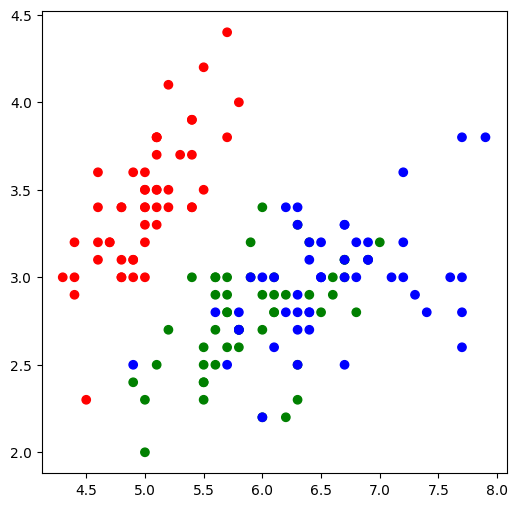

In [5]:
# визуализируем
cmap = ListedColormap(['red', 'green', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [6]:
#делим датасет на обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# функция метрики
def metric(a: np.array, b: np.array):
    return np.sqrt(np.sum(np.square(a - b)))

def metricL1(a: np.array, b: np.array):
    return np.sum(np.abs(a - b))

In [8]:
# что это за метрика ?

In [21]:
a=np.array([1,2,2])
b=np.array([1,5,6])
c=np.array([0,-1,1])
print(metric(a,b))
print(metric(a,c))
np.linalg.norm(a-b)

5.0
3.3166247903554


np.float64(5.0)

In [24]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            # получаем расстояние от классифицируемого объекта до очередного объекта обучающей выборки
            distance = metricL1(x, x_train[i])
            # вносим в список пару -  расстояние и класс на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        # создаем словарь с классами
        classes = {class_item: 0 for class_item in set(y_train)}
        # отбираем из отсортированного списка первых k элементов и подсчитаем частоту встречаемости классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        # Записываем в список ответов наибольший класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [25]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [27]:
def visualize(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .02
    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [32]:
k = 5 
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred

Точность алгоритма при k = 5: 0.833


[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(2)]

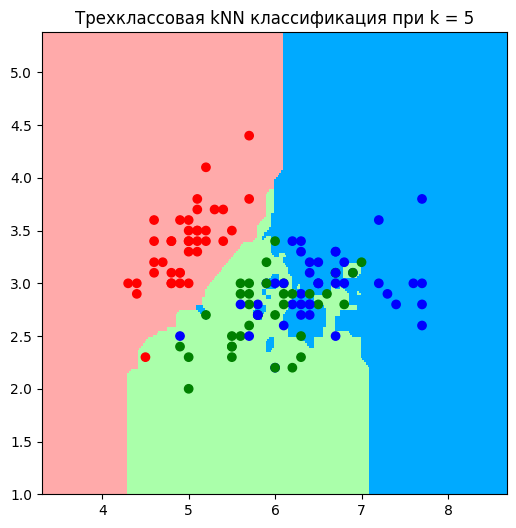

In [18]:
visualize(X_train, y_train, k)

Точность алгоритма при k = 3: 0.733


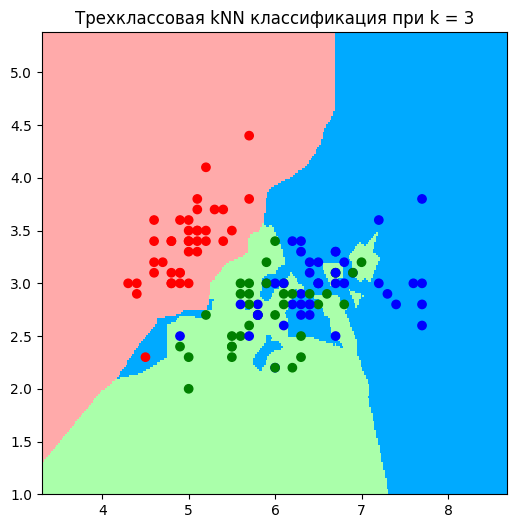

In [21]:
k = 3
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
visualize(X_train, y_train, k)

Точность алгоритма при k = 5: 0.867


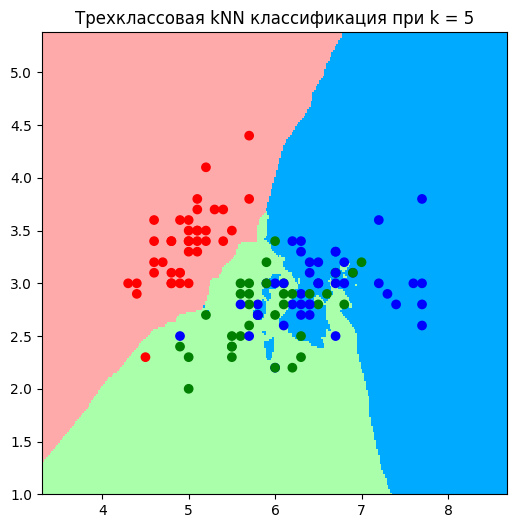

In [14]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
visualize(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833


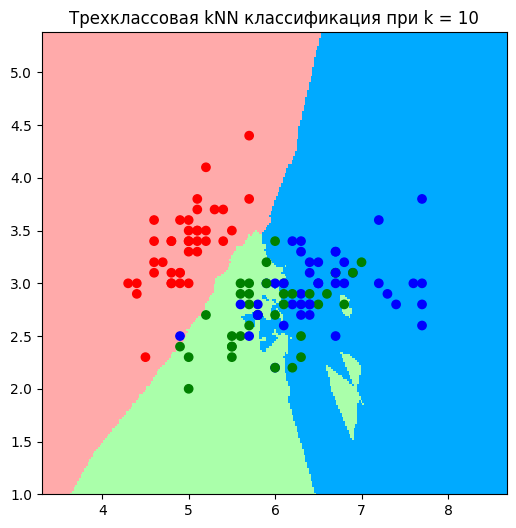

In [22]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
visualize(X_train, y_train, k)

## Библиотечная реализация классификатора KNN

In [23]:
from sklearn import datasets,neighbors
from sklearn.metrics import accuracy_score

In [24]:
dataset = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [25]:
dataset

(array([[ 2.21886651,  1.38263506],
        [ 2.07169996, -1.07356824],
        [-1.93977262, -0.85055602],
        [ 2.08436759,  1.07500638],
        [ 0.94998372,  0.61538543],
        [-0.3878893 , -0.95580336],
        [ 1.98118534,  0.58871202],
        [ 1.65508134, -1.29954273],
        [ 2.60996691,  0.67390406],
        [-0.29137472, -0.2257671 ],
        [-0.98418733, -0.29293569],
        [-0.15399877,  0.42254322],
        [-0.22167729, -0.32467969],
        [ 2.88285048, -1.44657734],
        [ 1.17459743, -0.90427191],
        [-0.31704075, -0.34842358],
        [ 1.48023527, -1.08130433],
        [ 1.51863252, -1.23980866],
        [-0.7044121 , -0.06132962],
        [ 1.06060558,  0.83918244],
        [ 3.04237626, -2.38948447],
        [-1.60671473, -1.21737505],
        [-0.2410213 , -0.44815041],
        [ 1.88783328, -1.70376068],
        [ 0.1286542 , -0.52542956],
        [-1.68428971,  1.29496961],
        [-0.7699091 , -0.5500474 ],
        [ 3.06365602, -2.161

In [26]:
def plot_dataset(dataset: (np.ndarray, np.ndarray)):
    colors = ListedColormap(["red", "blue", "yellow"])
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=dataset[1], cmap=colors, s=100)
    plt.show()

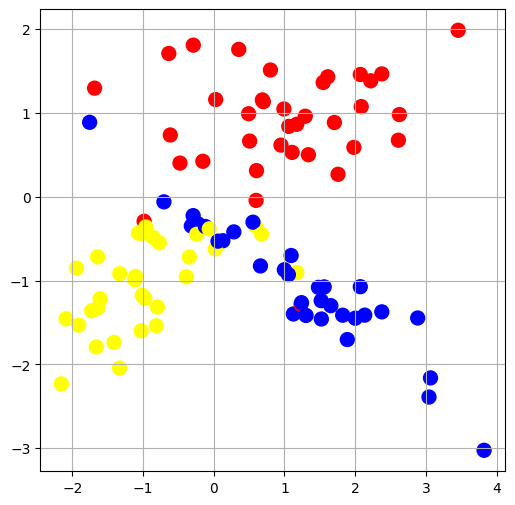

In [27]:
plot_dataset(dataset)

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *dataset,
    test_size=0.3,
    random_state=1,
)

In [29]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [30]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.9

## Случай посложнее

In [31]:
dataset = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

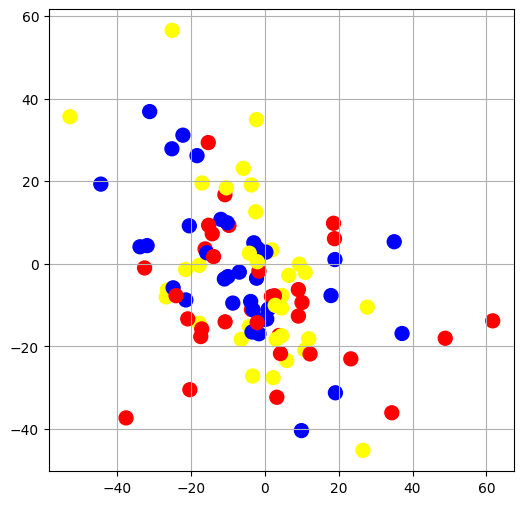

In [32]:
plot_dataset(dataset)

In [26]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *dataset,
    test_size=0.3,
    random_state=1,
)

In [27]:
clf = neighbors.KNeighborsClassifier() # n_neighbors=15
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [28]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.6

## вИна

In [29]:
import pandas as pd

In [30]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10782    0 10782    0     0  10750      0 --:--:--  0:00:01 --:--:-- 10760


In [31]:
dataset = pd.read_csv("wine.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
X = dataset.drop(0, axis=1).to_numpy()
y = dataset[0].to_numpy()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [34]:
# YOUR CODE HERE

## Bonus area

**Those who gets accuracy of at least 0.8 recieves bonus (0.5 max)**

## Дополнительный материал

## Кластеризация

    Обычно изучение ML начинаютс методов обучения с учителем, то есть задачи, в которой есть размеченный датасет с известными ответами.
Сейчас рассмотрим _обучение без учителя (unsupervised learning)_ в задаче кластеризации. Это семейство методов, где в роли обучающей 
выборки выступает просто набор объектов $x_{1},...,x_{l}$, и он же выступает в роли тестовой выборки, а задача состоит в проставлении 
меток $y_{1},...,y_{l}$ так, что бы объекты с одной и той же меткой были "похожи", а с разными - нет. То есть все объекты в пространстве
признаков нужно разделить на группы, найти структуру в данных.

### K-means

Одним из самых простых и популярных алгоритмов кластеризации является алгоритм _K-means (K-средних)_. Заключается он в следующих шагах:

1. Каким то образом задать количество кластеров $k$, на которые будут делиться данные.

2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.

3. Для каждой точки датасета вычислить, к какому из центроидов она ближе.

4. Переместить каждый центроид в центр выборки, отнесенной к своему центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$

5. Повторить шаги 4-5 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага менее заданного предела).


In [2]:
from sklearn.datasets import make_blobs
import random
X, y = make_blobs(n_samples=100, random_state=3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

NameError: name 'plt' is not defined

In [1]:
def metric(a: np.array, b: np.array):
    return np.sqrt(np.sum(np.square(a - b)))

NameError: name 'np' is not defined

In [37]:
def kmeans(data, k, max_iterations, min_distance):
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [metric(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
        # если все смещения меньше минимального, останавливаем алгоритм
        if optimal:
            break
    return old_centroids, classes

In [38]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(7,7))
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.show()

In [39]:
# определим максимальное количество итераций
max_iterations = 1
# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4
# сразу определим известное нам количество кластеров
k = 3

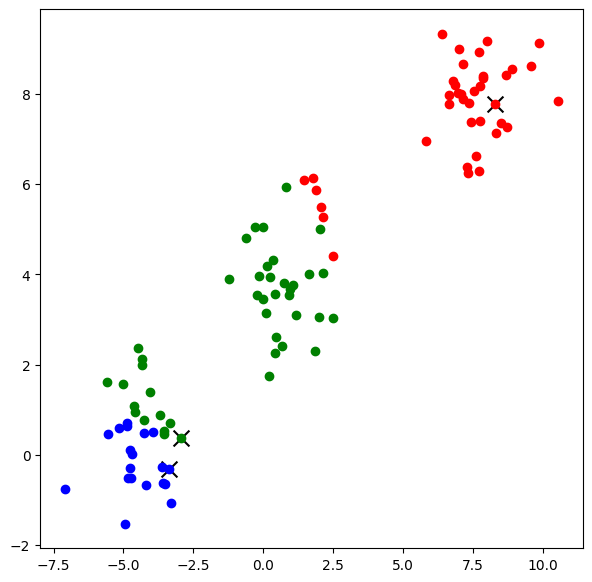

In [40]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

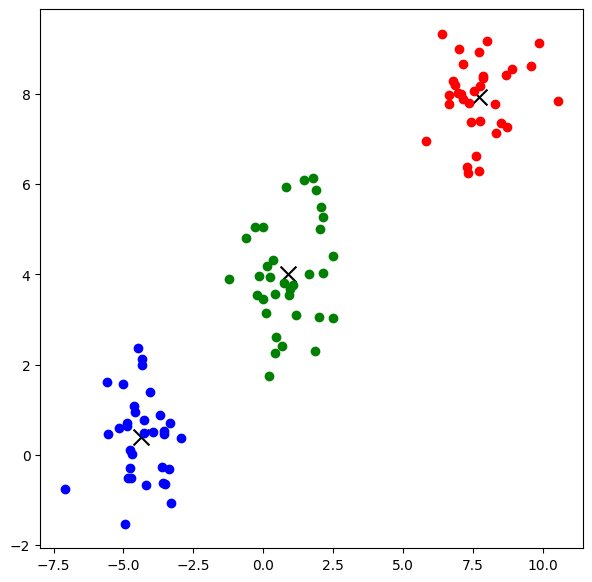

In [41]:
max_iterations = 5
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)